In [1]:
pip install cartopy

     ---------------------------------------- 10.9/10.9 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 6.1/6.1 MB 907.1 kB/s eta 0:00:00
     -------------------------------------- 46.5/46.5 kB 211.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sb
import numpy as np

In [4]:
df = pd.read_csv("C:\\Users\\Sunny\\Desktop\\Global_Earthquake_Data.csv")

In [5]:
df.isna().sum()

time                    0
latitude                0
longitude               0
depth                 592
mag                     0
magType                 1
nst                188836
gap                138772
dmin               212029
rms                 48317
net                     0
id                      0
updated                 0
place                 847
type                    0
horizontalError    219119
depthError         136863
magError           198246
magNst              85130
status                  0
locationSource          0
magSource               0
dtype: int64

In [6]:
df = df[['time', 'latitude', 'longitude', 'mag']]
df

,time,latitude,longitude,mag
0,2023-02-26T23:58:05.052Z,41.8050,79.8675,5.00
1,2023-02-26T23:33:17.641Z,18.7420,145.4868,4.80
2,2023-02-26T21:42:14.541Z,42.0857,79.9516,4.90
3,2023-02-26T21:35:01.303Z,14.9364,-104.5563,4.60
4,2023-02-26T18:58:54.828Z,44.6730,146.5159,4.50
...,...,...,...,...
283127,1906-01-21T13:49:33.570Z,34.1750,138.0250,7.40
283128,1906-01-09T23:04:45.570Z,49.2560,18.4210,5.63
283129,1906-01-08T00:15:00.000Z,39.3000,-96.6000,4.90
283130,1906-01-06T21:31:33.220Z,53.4180,170.1000,6.58


In [7]:
df.dtypes

time          object
latitude     float64
longitude    float64
mag          float64
dtype: object

In [8]:
# Convert time object to datetime object
df['time'] = pd.to_datetime(df['time'])

In [9]:
# Verifying data types are correct
df.dtypes

time         datetime64[ns, UTC]
latitude                 float64
longitude                float64
mag                      float64
dtype: object

In [10]:
# lets get some stat's for the data
df.describe()

,latitude,longitude,mag
count,283132.000000,283132.000000,283132.000000
mean,4.381654,41.885638,4.941265
std,29.459783,120.757518,0.486020
min,-84.133000,-179.999700,3.380000
25%,-17.426025,-71.499000,4.600000
50%,0.791000,99.178000,4.800000
75%,29.909250,142.308000,5.100000
max,87.386000,180.000000,9.500000


In [11]:
# Creating a variable of the max magnitude
max_index = df['mag'].idxmax() 
# storing the row of the largest earthquake
max_data = df.loc[max_index, :] 
max_data

time         1960-05-22 19:11:20+00:00
latitude                       -38.143
longitude                      -73.407
mag                                9.5
Name: 272373, dtype: object

C:\Users\Sunny\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


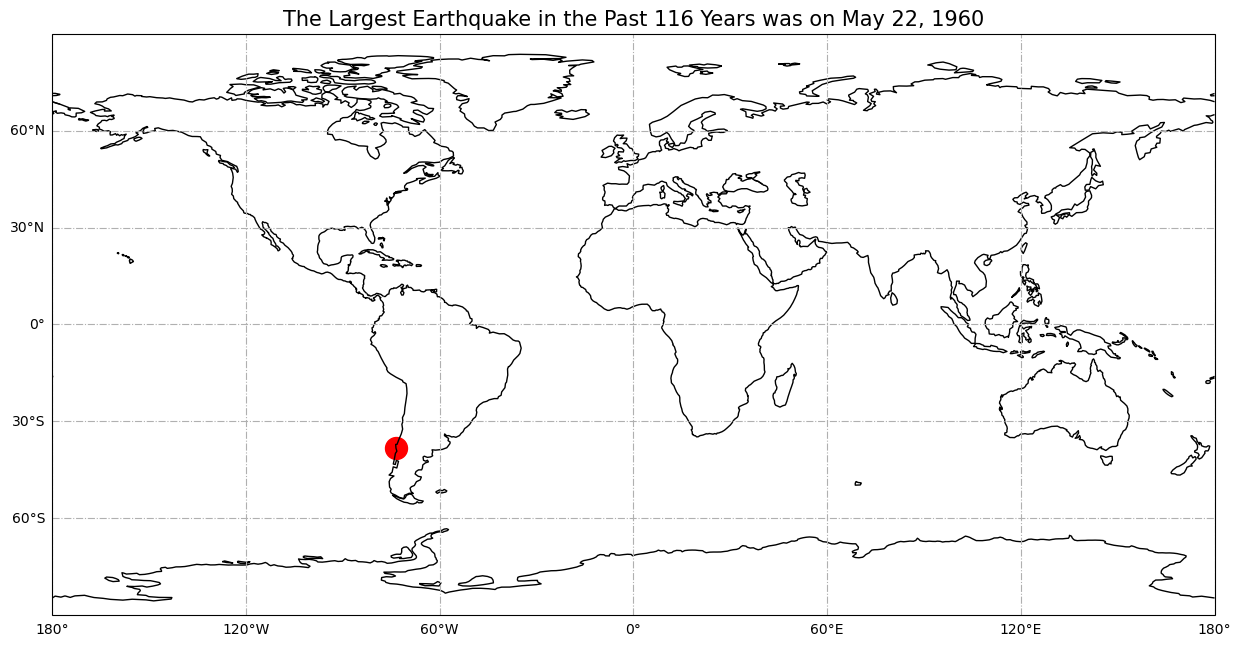

In [12]:
# creating a figure with size being 15 by 15
plt.figure(figsize=(15, 15)) 

# Projecting PlateCarree from the cartopy library
ax = plt.axes(projection=ccrs.PlateCarree()) 

# Showing entire globe in PlateCarree format
ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree()) 

# adding gridlines to the plot
gl = ax.gridlines(linestyle='-.', draw_labels=True) 
# removing the top label
gl.top_labels = False 
# removing the right label
gl.right_labels = False 

# adding coastlines to the plot
ax.coastlines() 

# Plotting the max magnitude data poin
p = ax.scatter(x=max_data['longitude'], y=max_data['latitude'], s=250, c='r') 

plt.title('The Largest Earthquake in the Past 116 Years was on May 22, 1960', fontsize=15)

plt.show()

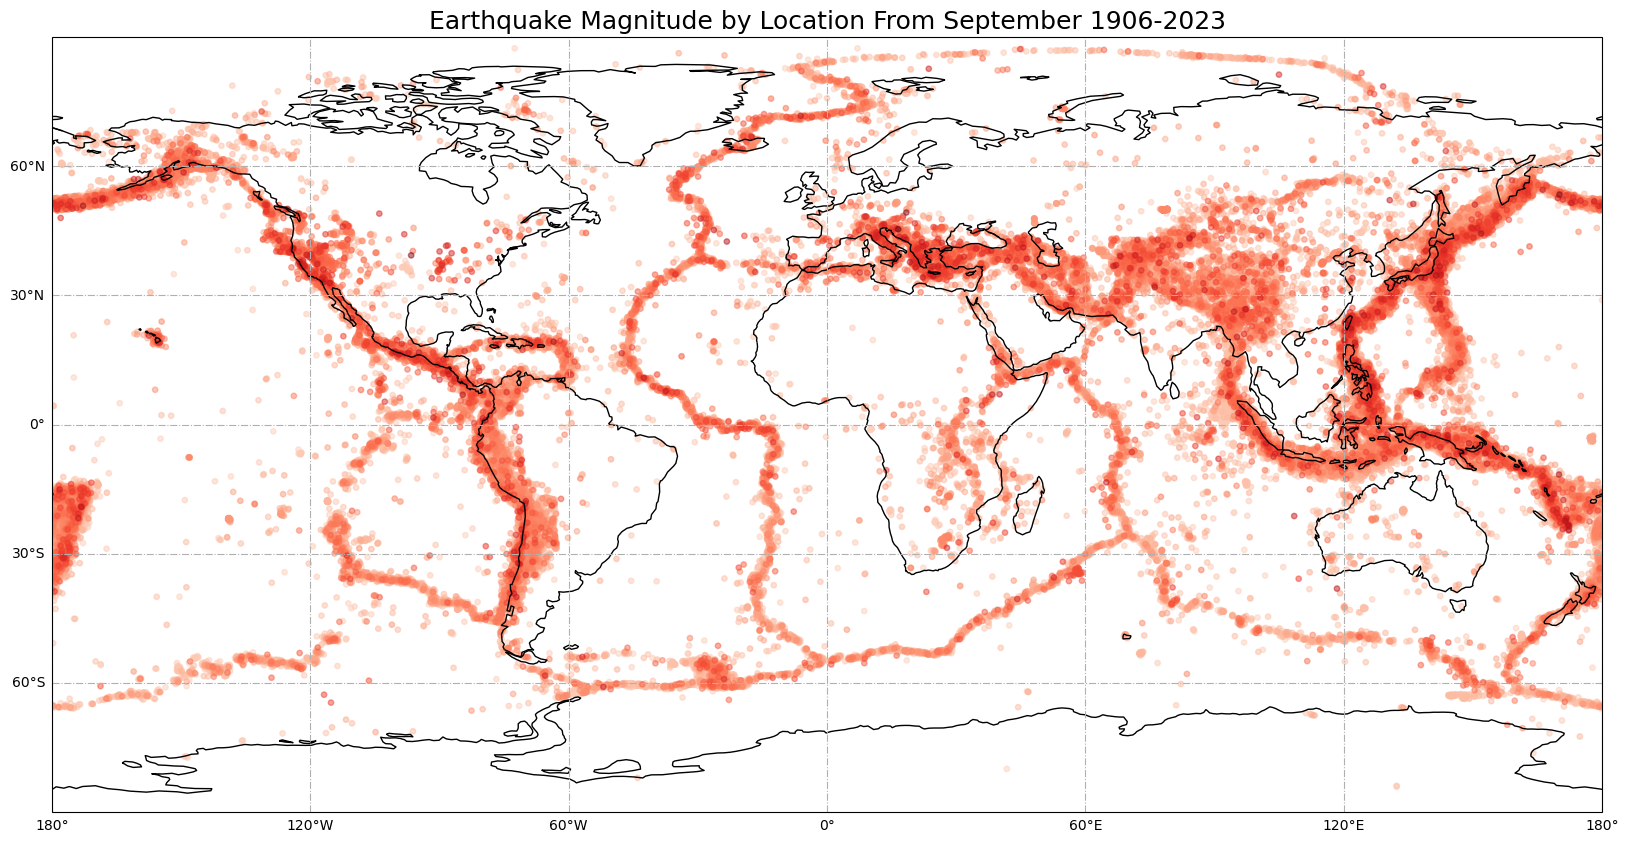

In [13]:
#examining all the earthquakes
plt.figure(figsize=(20, 20))
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()

p = ax.scatter(x=df['longitude'], y=df['latitude'], c =df['mag'].sort_values(), cmap='Reds', alpha=0.5, s=15)
plt.title('Earthquake Magnitude by Location From September 1906-2023', fontsize=18)


plt.ylabel('Magnitude', fontsize=16)

plt.show()

In [14]:
# create an new Dataframe with earthquakes of 8 or greater
strong_earthequakes = df[df['mag']>=8]
# looking at the amount of elements in the new DF
strong_earthequakes.shape 

(97, 4)

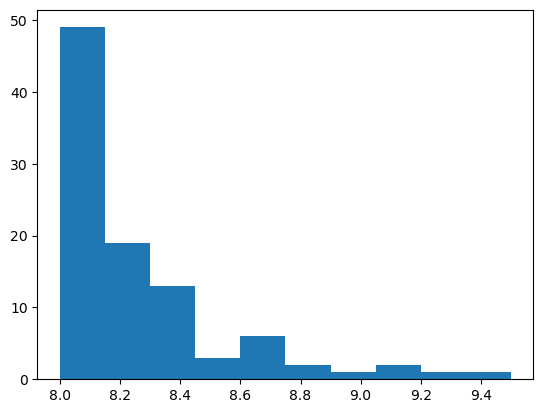

In [15]:
# Lets take a quick look at a histogram of the strong data magnitude
plt.hist(strong_earthequakes['mag'])
plt.show()

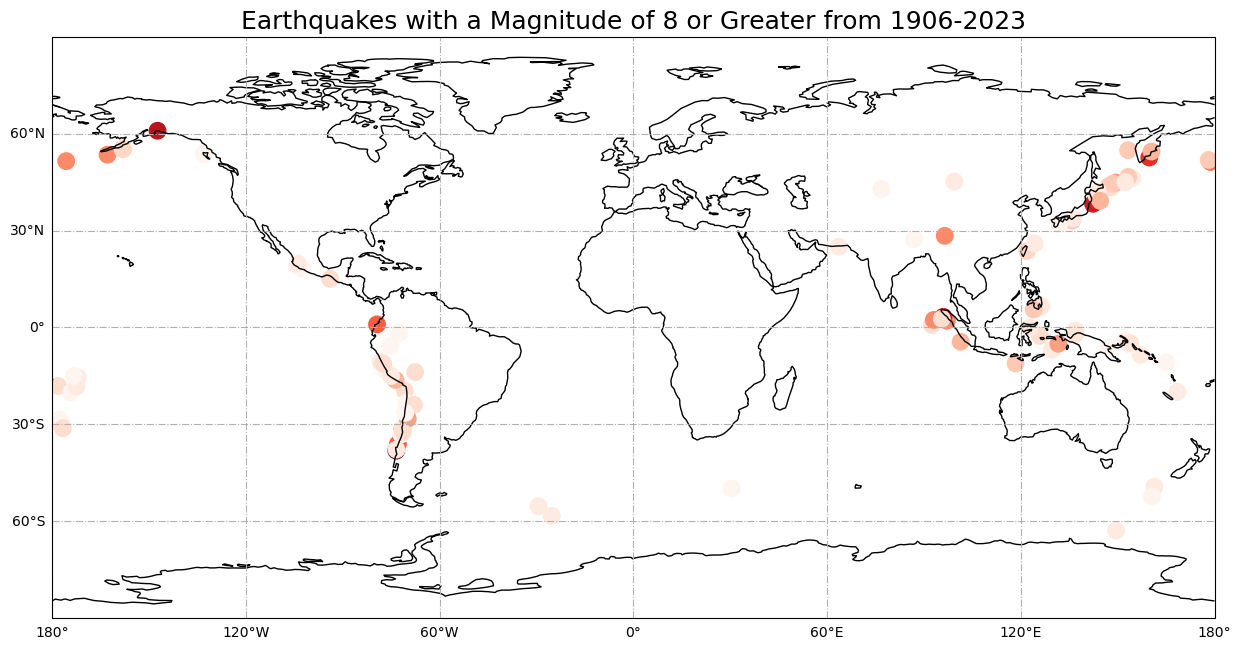

In [16]:
plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

# Zooming in on the graph
ax.set_extent((-180,180,-90,90), crs = ccrs.PlateCarree()) 

gl = ax.gridlines(linestyle='-.', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
ax.coastlines()

p = ax.scatter(x=strong_earthequakes['longitude'], y=strong_earthequakes['latitude'], c =strong_earthequakes['mag'], cmap='Reds', s=140)
plt.title('Earthquakes with a Magnitude of 8 or Greater from 1906-2023', fontsize=18)


plt.show()

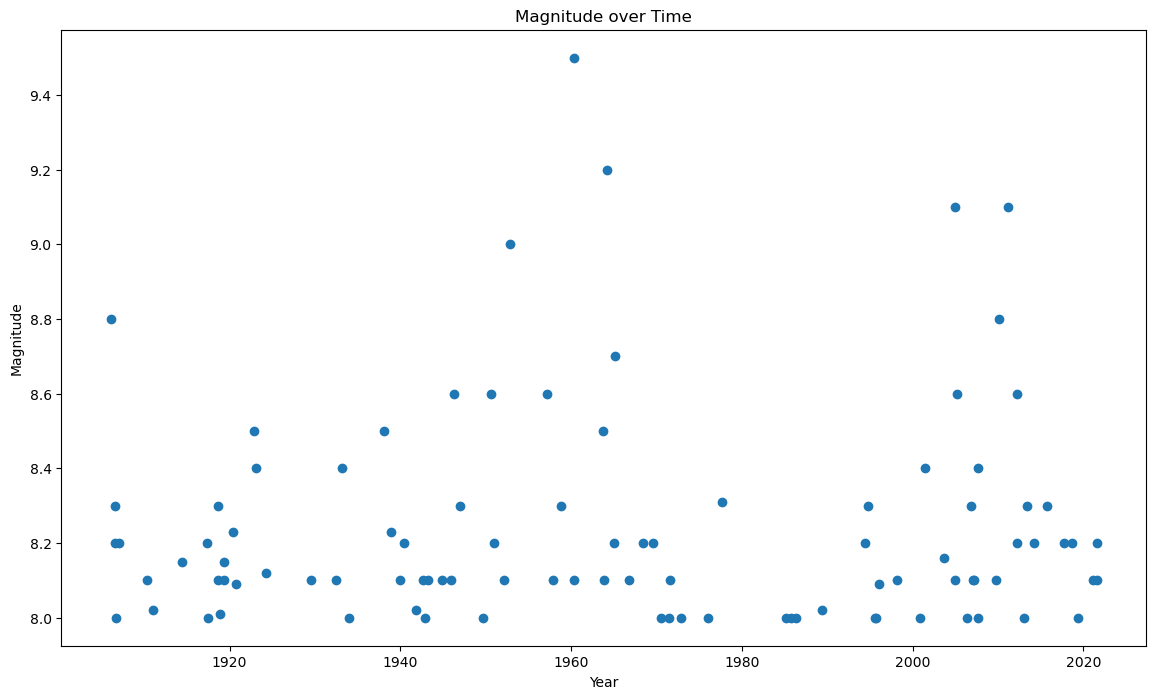

In [17]:
plt.figure(figsize=(14, 8))
plt.scatter(strong_earthequakes['time'], strong_earthequakes['mag'])
plt.title("Magnitude over Time")
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.show()

In [18]:
df_size = len(df['time'])
df_size

strong_earthequakes_size = len(strong_earthequakes['time'])
strong_earthequakes_size

print('{} is the percentage of strong earthquakes to all earthquakes >4.5 magnitude'.format((strong_earthequakes_size / df_size) * 100))

0.03425963861379145 is the percentage of strong earthquakes to all earthquakes >4.5 magnitude
